In [5]:
# Import necessary libraries
import pandas as pd
import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from ucimlrepo import fetch_ucirepo
from sklearn.feature_selection import SelectFromModel 

spambase = fetch_ucirepo(id=94)

# Data (features and target)
X = spambase.data.features
y = spambase.data.targets

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# use SelectFromModel function
sfm = SelectFromModel(model, threshold=0.01)
sfm.fit(X, y)
# extract important feautres
X_important = sfm.transform(X)

selected_features = X.columns[sfm.get_support()]
# new columns
X_important_df = pd.DataFrame(X_important, columns=selected_features)

print(f'the original features: {X.shape[1]}')
print(f'the featurse are selected : {X_important.shape[1]}')
print('features :', selected_features.tolist())


X_important_df
X = X_important_df


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_rep)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/codespace/.local/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


the original features: 57
the featurse are selected : 24
features : ['word_freq_all', 'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_will', 'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_your', 'word_freq_000', 'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_1999', 'word_freq_edu', 'char_freq_(', 'char_freq_!', 'char_freq_$', 'capital_run_length_average', 'capital_run_length_longest', 'capital_run_length_total']


/home/codespace/.local/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.96

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       531
           1       0.97      0.92      0.95       390

    accuracy                           0.96       921
   macro avg       0.96      0.95      0.95       921
weighted avg       0.96      0.96      0.96       921



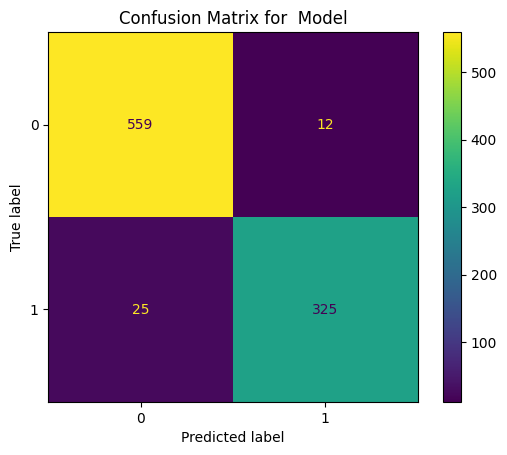

In [3]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap='viridis', values_format='d')

plt.title('Confusion Matrix for  Model')
plt.show()

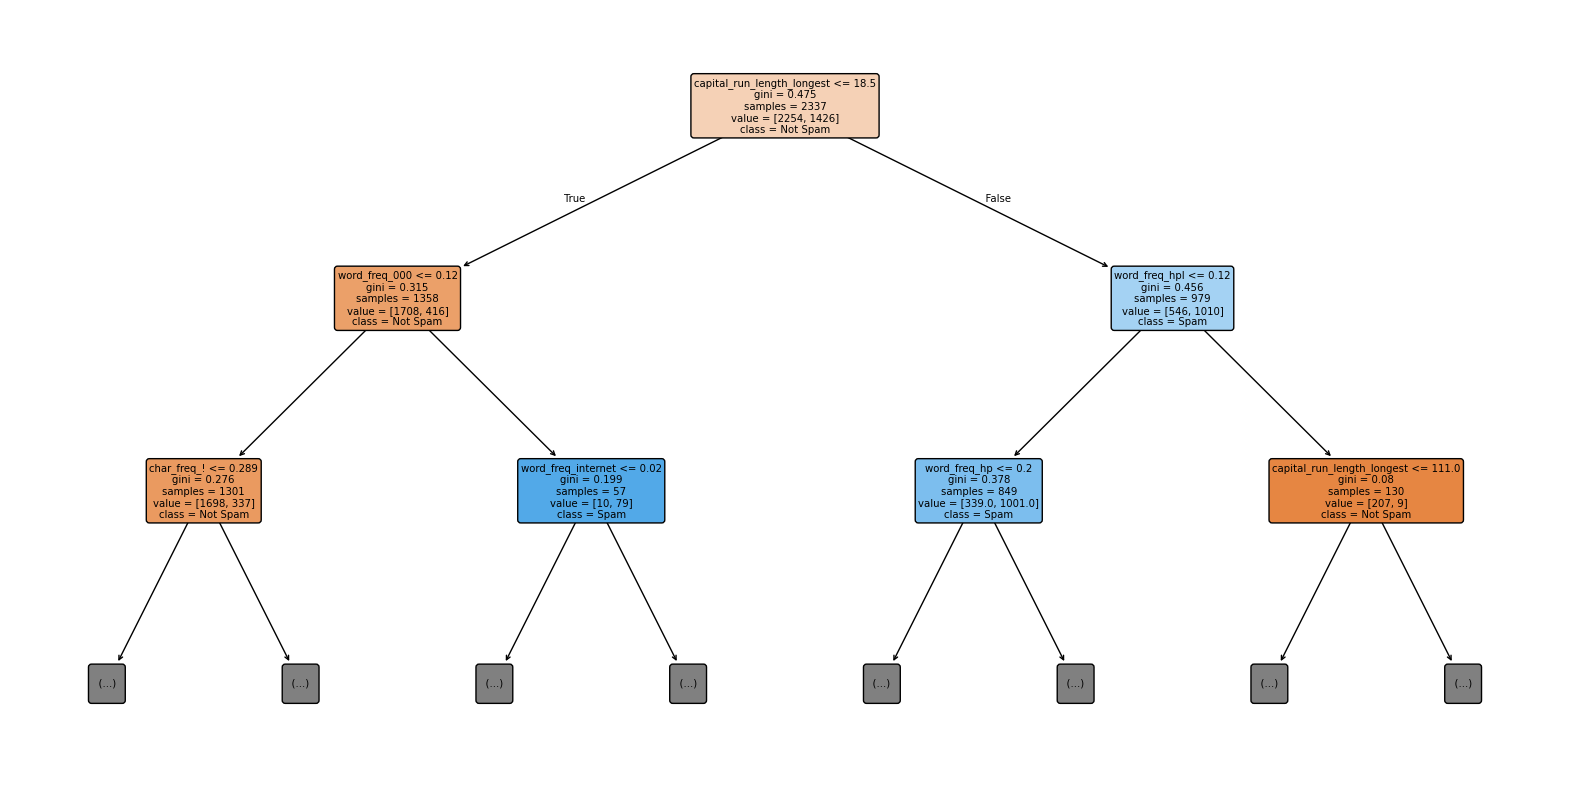

In [6]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


estimator = rf_classifier.estimators_[0] 


plt.figure(figsize=(20,10))
plot_tree(estimator, 
          feature_names=selected_features, 
          class_names=["Not Spam", "Spam"], 
          filled=True, 
          rounded=True, 
          max_depth=2) 
plt.show()

In [8]:
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

Mean Squared Error: 0.04
R-squared Score: 0.82
